In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix , classification_report

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/DigitsRecognizer/train.csv')
dataset.shape

(42000, 785)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(dataset.drop('label',axis=1),dataset.label,test_size=0.1,random_state=42,stratify=dataset.label)

In [6]:
def reshaped_data(data_frame):
    data = []
    for row in range(data_frame.shape[0]):
        single_list =[]
        for j in range(28):
            list_data=[]
            for i in range(28):
                x = (i*28) + j
                list_data.append(data_frame.iloc[row,x])
            list_data = np.array(list_data)
            single_list.append(list_data)
        single_list = np.array(single_list)
        data.append(single_list)
    return np.array(data)


In [7]:
x_train = reshaped_data(x_train)
x_test = reshaped_data(x_test)
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
model = Sequential([
    BatchNormalization(input_shape=(28,28,1)),

    Conv2D(filters= 32, kernel_size=(5, 5),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    BatchNormalization(),
    Conv2D(filters= 50, kernel_size=(3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),


    BatchNormalization(),
    Conv2D(filters= 50, kernel_size=(2, 2), padding='same',activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    BatchNormalization(),
    Dense(450,activation='relu'),

    Dropout(0.33),
    BatchNormalization(),
    Dense(196,activation='relu'),

    Dropout(0.33),
    BatchNormalization(),
    Dense(64,activation='relu'),

    Dropout(0.33),
    BatchNormalization(),
    Dense(10,activation='softmax')

])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        14450     
                                                        

In [9]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
model_history=model.fit(x_train,y_train,
                        validation_split=0.2,batch_size=32,
                        epochs=150,callbacks=early_stopping)

Epoch 1/150
945/945 [==============================] - 18s 9ms/step - loss: 0.3582 - accuracy: 0.8981 - val_loss: 0.0579 - val_accuracy: 0.9812
Epoch 2/150
945/945 [==============================] - 7s 7ms/step - loss: 0.1310 - accuracy: 0.9631 - val_loss: 0.0459 - val_accuracy: 0.9845
Epoch 3/150
945/945 [==============================] - 8s 8ms/step - loss: 0.1023 - accuracy: 0.9714 - val_loss: 0.0443 - val_accuracy: 0.9874
Epoch 4/150
945/945 [==============================] - 7s 7ms/step - loss: 0.0816 - accuracy: 0.9762 - val_loss: 0.0421 - val_accuracy: 0.9878
Epoch 5/150
945/945 [==============================] - 8s 8ms/step - loss: 0.0729 - accuracy: 0.9791 - val_loss: 0.0456 - val_accuracy: 0.9869
Epoch 6/150
945/945 [==============================] - 7s 7ms/step - loss: 0.0659 - accuracy: 0.9814 - val_loss: 0.0504 - val_accuracy: 0.9849
Epoch 7/150
945/945 [==============================] - 8s 8ms/step - loss: 0.0610 - accuracy: 0.9825 - val_loss: 0.0425 - val_accuracy: 0.988

In [11]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

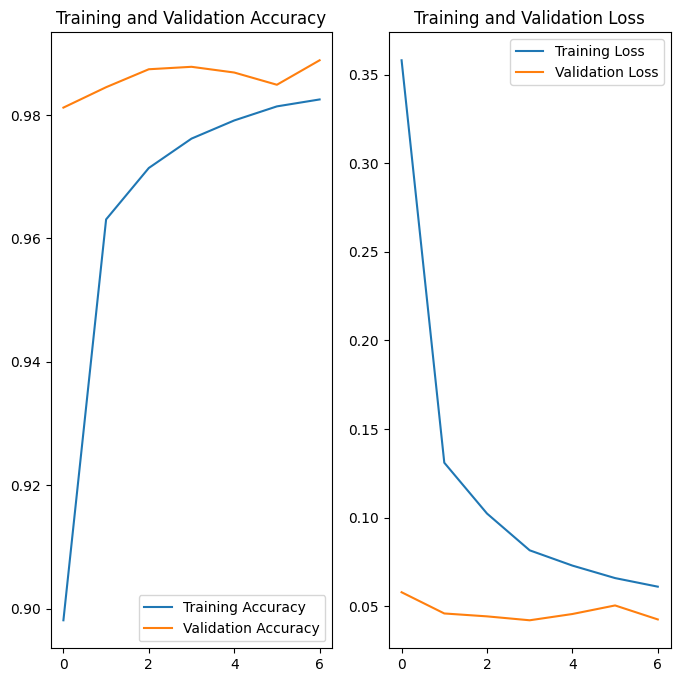

In [13]:
EPOCH=7
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
digitModel=model.save('/content/drive/MyDrive/DigitsRecognizer/digitModel.h5')

In [16]:
model.evaluate(x_test,y_test)

132/132 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9871


[0.04333919286727905, 0.9871428608894348]

132/132 [==============================] - 1s 4ms/step


Text(120.72222222222221, 0.5, 'Truth')

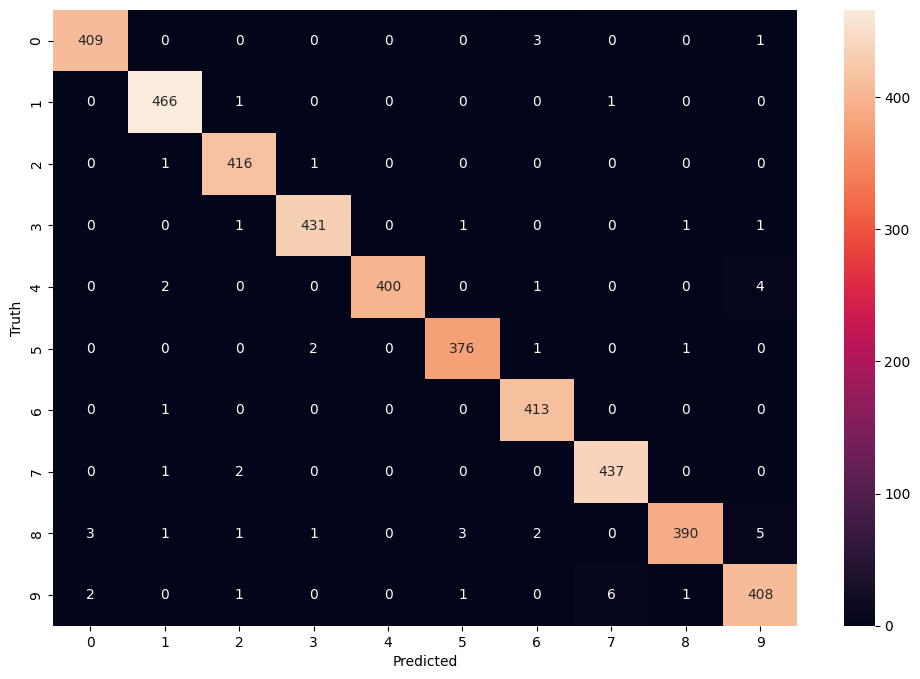

In [17]:
y_pred = model.predict(x_test)
y_pred_num = [np.argmax(element) for element in y_pred]
confussion_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_num)
plt.figure(figsize=(12,8))
sns.heatmap(confussion_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_num})
result

,Actual,Predicted
28152,0,0
38060,8,8
5550,7,7
34387,9,9
948,2,2
...,...,...
23200,6,6
18400,9,9
7440,5,5
37535,1,1


1/1 [==============================] - 0s 134ms/step


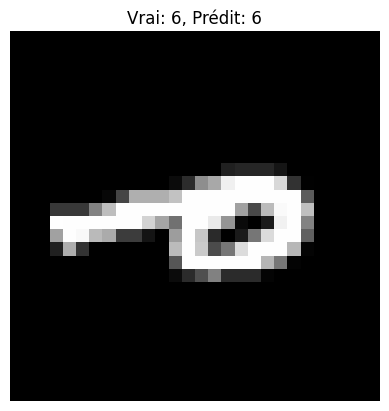

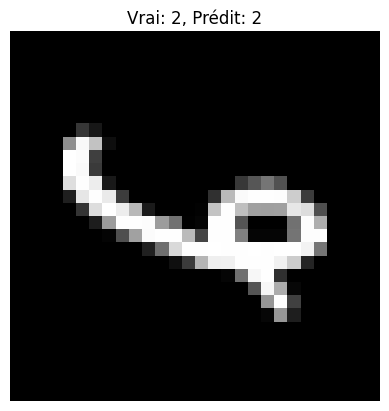

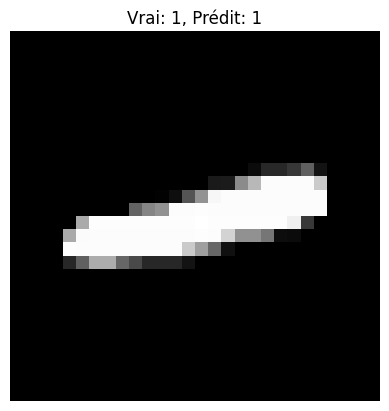

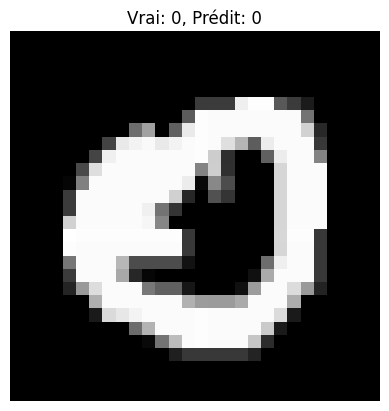

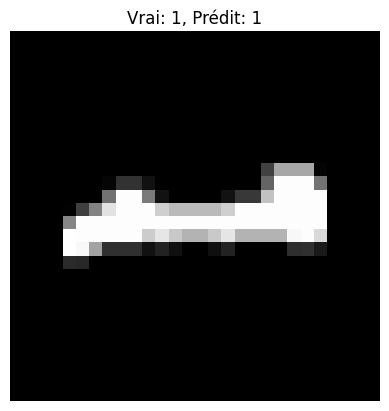

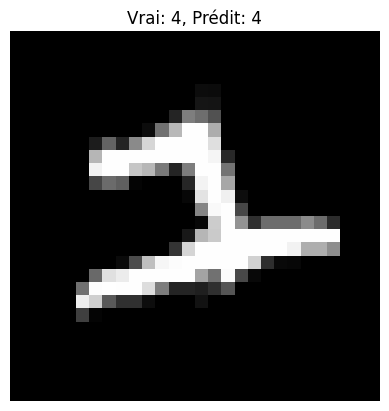

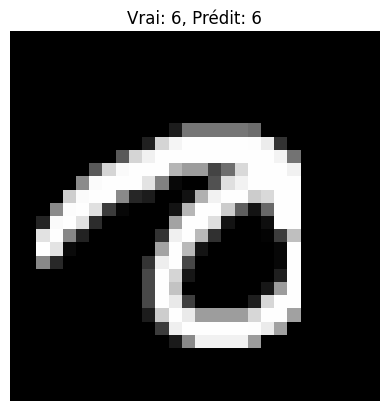

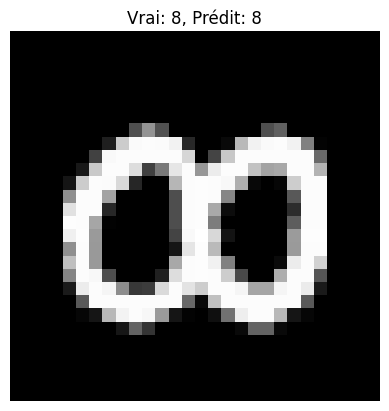

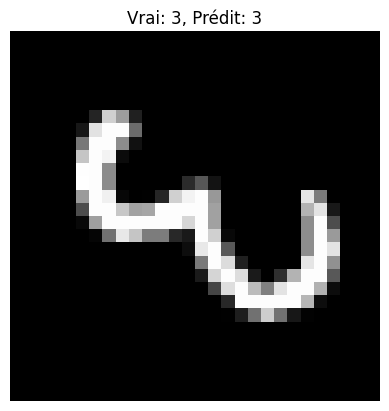

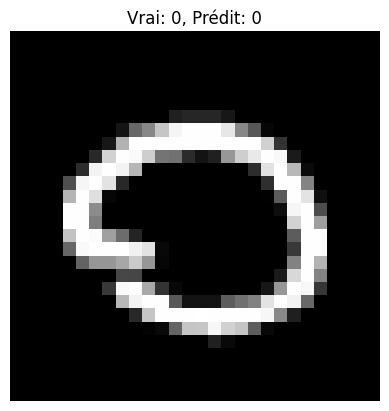

In [21]:
import numpy as np
import matplotlib.pyplot as plt
num_images_to_test = 10
random_indices = np.random.choice(x_test.shape[0], num_images_to_test, replace=False)
test_images = x_test[random_indices]
test_labels = y_test.to_numpy()[random_indices]
predictions = model.predict(test_images)
for i in range(num_images_to_test):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Vrai: {test_labels[i]}, Prédit: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
